In [1]:
import pandas as pd
import numpy as np

# Step 1: Load CAFC Dataset with Correct Encoding
df_raw = pd.read_csv(r"C:\Users\Prof A R Kimbir\Desktop\Canada dataset.csv", encoding='ISO-8859-1')

# Step 2: Clean Column Names
df_raw.columns = df_raw.columns.str.strip().str.replace(' ', '_').str.replace('/', '_').str.replace("'", '')

# Step 3: Clean Dollar Loss Column (with Raw Regex String)
df_raw['Dollar_Loss__pertes_financières'] = df_raw['Dollar_Loss__pertes_financières'].replace(r'[\$,]', '', regex=True)
df_raw['Dollar_Loss__pertes_financières'] = pd.to_numeric(df_raw['Dollar_Loss__pertes_financières'], errors='coerce').fillna(0)

# Step 4: Generate Step Number
df_raw['step'] = df_raw.index + 1



In [3]:
# Step 5: Define Type of Transaction (use English column)
df_raw['type'] = df_raw['Fraud_and_Cybercrime_Thematic_Categories'].fillna('Other')

# Step 6: Amount is Dollar Loss
df_raw['amount'] = df_raw['Dollar_Loss__pertes_financières']

# Step 7: Simulate Name IDs
np.random.seed(42)
df_raw['nameOrig'] = ['C' + str(np.random.randint(100000000, 999999999)) for _ in range(len(df_raw))]
df_raw['nameDest'] = ['M' + str(np.random.randint(100000000, 999999999)) for _ in range(len(df_raw))]

# Step 8: Simulate Account Balances
df_raw['oldbalanceOrg'] = df_raw['amount'] + np.random.uniform(100, 10000, size=len(df_raw))
df_raw['newbalanceOrig'] = df_raw['oldbalanceOrg'] - df_raw['amount']
df_raw['oldbalanceDest'] = np.random.uniform(0, 5000, size=len(df_raw))
df_raw['newbalanceDest'] = df_raw['oldbalanceDest'] + df_raw['amount']

# Step 9: Define Fraud Flag (Victim = Fraud) — Correct column name used
df_raw['isFraud'] = np.where(df_raw['Complaint_Type'].str.strip() == 'Victim', 1, 0)

# Step 10: Define Flagged Fraud if Amount > 5000
df_raw['isFlaggedFraud'] = np.where(df_raw['amount'] > 5000, 1, 0)

# Step 11: Save Final Dataset
final_df = df_raw[['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg',
                   'newbalanceOrig', 'nameDest', 'oldbalanceDest',
                   'newbalanceDest', 'isFraud', 'isFlaggedFraud']]

final_df.to_csv(r"C:\Users\Prof A R Kimbir\Desktop\new dataset3.csv", index=False)

print("Preprocessing Successful. Cleaned dataset saved as 'new dataset3.csv'")
print(final_df.head())


Preprocessing Successful. Cleaned dataset saved as 'new dataset3.csv'
   step          type  amount    nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1         Other    0.00  C634895718    4230.189219     4230.189219   
1     2   Merchandise   97.34  C299900595    1064.299916      966.959916   
2     3     Extortion  180.00  C962061404    3638.530720     3458.530720   
3     4  Vendor Fraud  300.00  C887846414    5130.042487     4830.042487   
4     5   Merchandise   50.00  C227521863    6689.771278     6639.771278   

     nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M555760227     2214.498229     2214.498229        0               0  
1  M383950728     1552.406838     1649.746838        1               0  
2  M446352480     3377.354653     3557.354653        1               0  
3  M168662756      722.465208     1022.465208        1               0  
4  M425037114      480.454053      530.454053        1               0  


Fraud class distribution:
 isFraud
1    0.649577
0    0.350423
Name: proportion, dtype: float64
Epoch 1/10
4428/4428 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8308 - loss: 0.3753 - val_accuracy: 0.8617 - val_loss: 0.3004
Epoch 2/10
4428/4428 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8635 - loss: 0.3021 - val_accuracy: 0.8684 - val_loss: 0.2885
Epoch 3/10
4428/4428 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8697 - loss: 0.2910 - val_accuracy: 0.8716 - val_loss: 0.2850
Epoch 4/10
4428/4428 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8715 - loss: 0.2876 - val_accuracy: 0.8655 - val_loss: 0.2832
Epoch 5/10
4428/4428 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.8708 - loss: 0.2859 - val_accuracy: 0.8720 - val_loss: 0.2841
Epoch 6/10
4428/4428 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8727 - loss: 0.2843 - val_accuracy: 0.8714 - val_loss: 0.2769
Epoch 7/10
4428/4428 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.8718 - loss: 0.2823 - val_accuracy: 0.8770 - val_

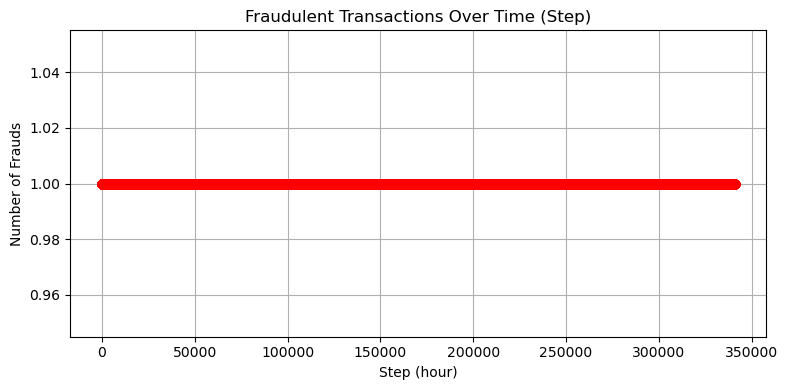

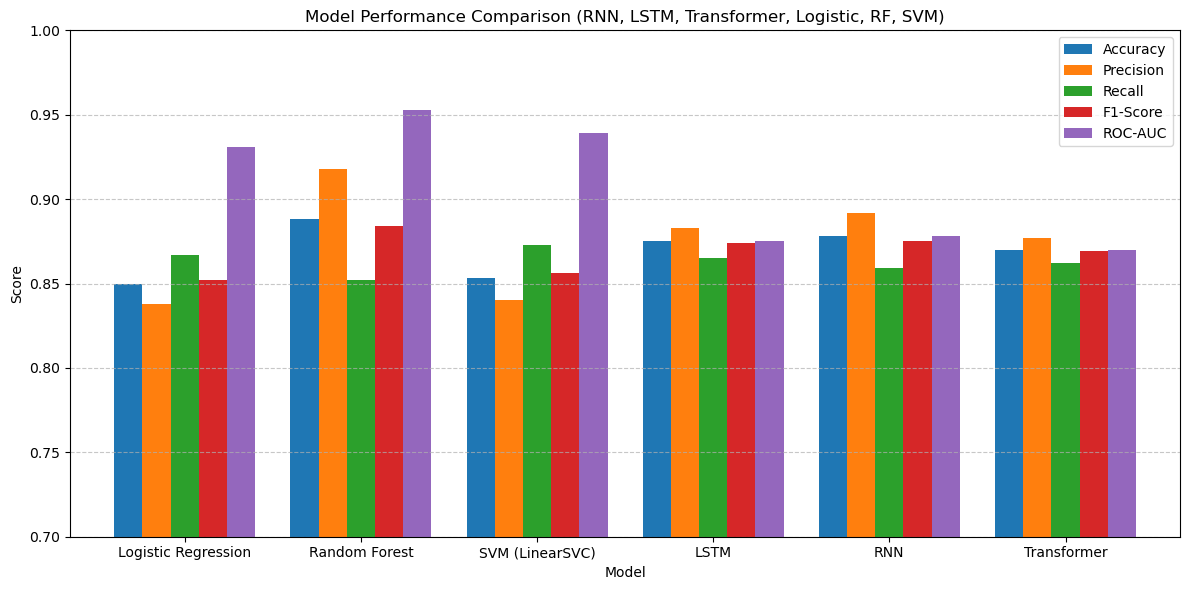

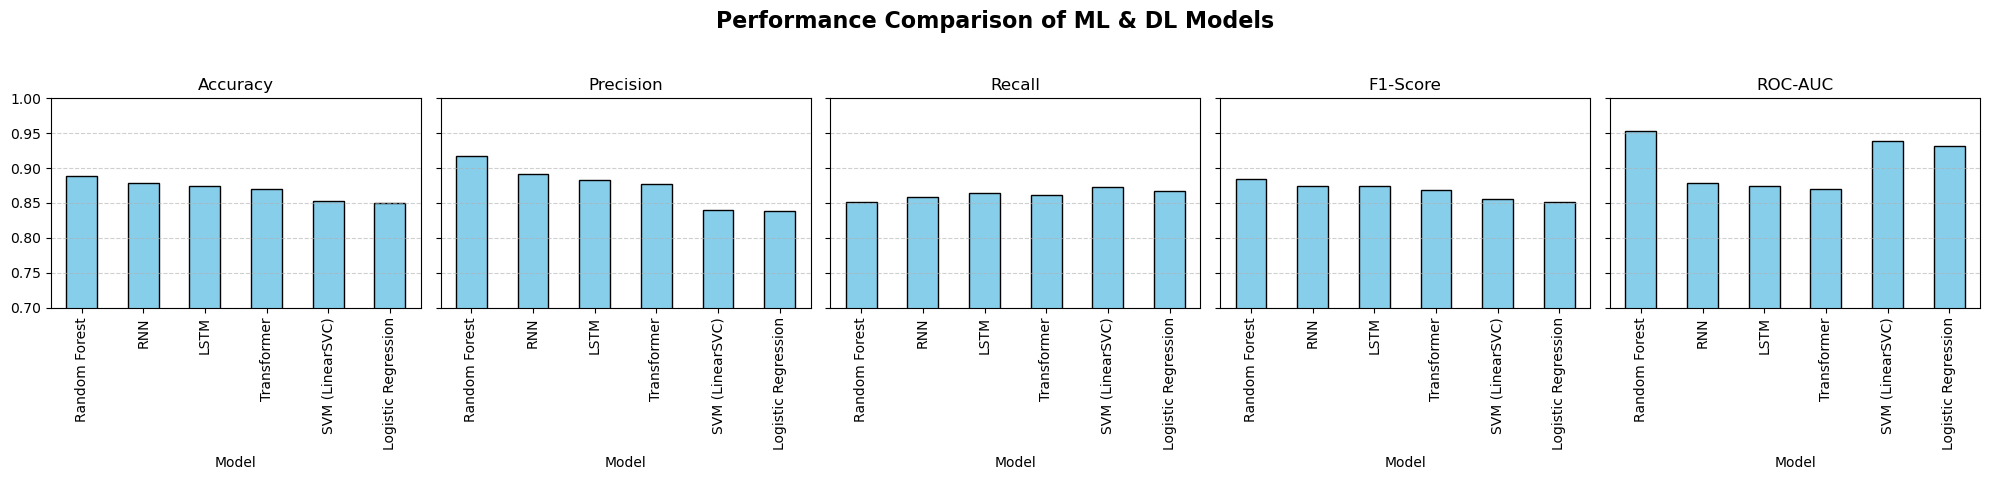

In [5]:
# -----------------------------
# Libraries and Setup
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

# -----------------------------
# Load Data
# -----------------------------
df = pd.read_csv(r"C:\Users\Prof A R Kimbir\Desktop\new dataset3.csv")

print("Fraud class distribution:\n", df['isFraud'].value_counts(normalize=True))

# -----------------------------
#  Feature Engineering
# -----------------------------
df['transaction_time'] = pd.to_datetime(df['step'], unit='h', origin='2022-01-01')
df['hour'] = df['transaction_time'].dt.hour
df['dayofweek'] = df['transaction_time'].dt.dayofweek

# Drop unwanted columns
df_cleaned = df.drop(['nameOrig', 'nameDest', 'step', 'transaction_time', 'isFlaggedFraud'], axis=1)

# -----------------------------
#  Prepare Data
# -----------------------------
X = df_cleaned.drop('isFraud', axis=1)
y = df_cleaned['isFraud']

# One-hot encode categorical variable 'type'
X = pd.get_dummies(X, columns=['type'], drop_first=True)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# -----------------------------
#  Classical Models
# -----------------------------

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# Linear SVM with Calibration
linear_svm = LinearSVC(max_iter=1000, random_state=42)
calibrated_svm = CalibratedClassifierCV(linear_svm, method='sigmoid', cv=3)
calibrated_svm.fit(X_train, y_train)
y_pred_svm = calibrated_svm.predict(X_test)
y_prob_svm = calibrated_svm.predict_proba(X_test)[:, 1]

# -----------------------------
#  Deep Learning Models
# -----------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Reshape for RNN/LSTM
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# LSTM Model
model_lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3)
model_lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stop])

# Simple RNN Model
model_rnn = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(1, X_train.shape[1])),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.fit(X_train_lstm, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Transformer-Like Dense Model
import tensorflow as tf
from tensorflow.keras import layers

input_layer = layers.Input(shape=(X_train.shape[1],))
x = layers.Dense(128, activation='relu')(input_layer)
x = layers.LayerNormalization()(x)
x = layers.MultiHeadAttention(num_heads=4, key_dim=32)(x[:, tf.newaxis, :], x[:, tf.newaxis, :])
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.3)(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)

model_transformer = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_transformer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_transformer.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# -----------------------------
#  Model Evaluation
# -----------------------------

def evaluate_model(y_true, y_pred, model_name, y_prob=None):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_prob if y_prob is not None else y_pred)
    }

# Evaluate ML Models
results = [
    evaluate_model(y_test, y_pred_log, "Logistic Regression", y_prob_log),
    evaluate_model(y_test, y_pred_rf, "Random Forest", y_prob_rf),
    evaluate_model(y_test, y_pred_svm, "SVM (LinearSVC)", y_prob_svm)
]

# Evaluate DL Models on Test Set
y_pred_lstm = (model_lstm.predict(X_test_lstm) > 0.5).astype(int).flatten()
y_pred_rnn = (model_rnn.predict(X_test_lstm) > 0.5).astype(int).flatten()
y_pred_transformer = (model_transformer.predict(X_test) > 0.5).astype(int).flatten()

results += [
    evaluate_model(y_test, y_pred_lstm, "LSTM"),
    evaluate_model(y_test, y_pred_rnn, "RNN"),
    evaluate_model(y_test, y_pred_transformer, "Transformer")
]

# -----------------------------
#  Results Summary
# -----------------------------
comparison_df = pd.DataFrame(results).set_index("Model").round(3)
print("\nModel Performance Comparison:\n")
print(comparison_df)

# -----------------------------
#  Visualization
# -----------------------------

# Fraud Count Over Time
fraud_over_time = df[df['isFraud'] == 1].groupby('step').size()
plt.figure(figsize=(8, 4))
plt.plot(fraud_over_time.index, fraud_over_time.values, marker='o', linestyle='-', color='red')
plt.title("Fraudulent Transactions Over Time (Step)")
plt.xlabel("Step (hour)")
plt.ylabel("Number of Frauds")
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar Plot of Model Comparison
comparison_df.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title("Model Performance Comparison (RNN, LSTM, Transformer, Logistic, RF, SVM)")
plt.ylabel("Score")
plt.ylim(0.7, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Multiple Metric Subplots
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
comparison_df_sorted = comparison_df.sort_values(by="F1-Score", ascending=False)

fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5), sharey=True)
for i, metric in enumerate(metrics):
    comparison_df_sorted[metric].plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(metric)
    axes[i].set_ylim(0.7, 1.0)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.suptitle("Performance Comparison of ML & DL Models", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [7]:
# Random Forest Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf_random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_dist,
    n_iter=10,   # Run 10 random combinations
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rf_random_search.fit(X_train, y_train)

print("Best RF Params:", rf_random_search.best_params_)
print("Best RF F1 Score (CV):", rf_random_search.best_score_)
best_rf = rf_random_search.best_estimator_



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best RF Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Best RF F1 Score (CV): 0.8891736904751993


In [9]:
# LSTM Hyperparameter Tuning with KerasTuner
import keras_tuner as kt
from tensorflow.keras import layers, models

def build_lstm_model(hp):
    model = models.Sequential()
    model.add(layers.LSTM(
        hp.Int('units', min_value=32, max_value=128, step=32),
        return_sequences=True,
        input_shape=(1, X_train.shape[1])
    ))
    model.add(layers.Dropout(hp.Choice('dropout1', [0.2, 0.3])))

    model.add(layers.LSTM(
        hp.Int('units2', min_value=16, max_value=64, step=16)
    ))
    model.add(layers.Dropout(hp.Choice('dropout2', [0.2, 0.3])))

    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Reshape for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

# Use Hyperband (adaptive early stopping)
tuner = kt.Hyperband(
    build_lstm_model,
    objective='val_accuracy',
    max_epochs=10,   # Can increase later
    factor=3,
    directory='lstm_tuning',
    project_name='fraud_lstm_hyperband'
)

tuner.search(X_train_lstm, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

best_lstm_model = tuner.get_best_models(1)[0]
best_lstm_model.summary()


Reloading Tuner from lstm_tuning\fraud_lstm_hyperband\tuner0.json



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 96)               │          54,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 96)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,073 (277.63 KB)

 Trainable params: 71,073 (277.63 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# quantize_export.py
from __future__ import annotations
import os
from pathlib import Path
import json
import numpy as np
import joblib

EXPORT_DIR = Path("exported_models")

def _ensure_dir(p: Path | str) -> Path:
    p = Path(p)
    p.mkdir(parents=True, exist_ok=True)
    return p

def _bytes_to_mb(path: Path) -> float:
    return path.stat().st_size / (1024 ** 2)

# =====================================================
# Random Forest: size-optimized export
# =====================================================
def export_random_forest_minified(
    rf_model,
    X_ref: np.ndarray,
    base_name: str = "random_forest_tuned",
    enable_onnx: bool = True
) -> dict:
    """
    Minimizes RF size:
      1) Downcast tree arrays to float32
      2) Save PKL with XZ compression
      3) Optional: export ONNX and quantize to INT8
    """
    _ensure_dir(EXPORT_DIR)

    pkl_path = EXPORT_DIR / f"{base_name}.pkl"
    onnx_path = EXPORT_DIR / f"{base_name}.onnx"
    onnx_q_path = EXPORT_DIR / f"{base_name}_int8.onnx"

    # Downcast internals
    try:
        for est in rf_model.estimators_:
            try:
                est.tree_.threshold = est.tree_.threshold.astype(np.float32, copy=False)
                est.tree_.value = est.tree_.value.astype(np.float32, copy=False)
            except Exception:
                pass
    except Exception:
        pass

    joblib.dump(rf_model, pkl_path.as_posix(), compress=("xz", 3))
    sizes = {"pkl_mb": _bytes_to_mb(pkl_path)}

    if enable_onnx:
        try:
            from skl2onnx import convert_sklearn
            from skl2onnx.common.data_types import FloatTensorType
            from onnxruntime.quantization import quantize_dynamic, QuantType

            n_features = X_ref.shape[1]
            onnx_model = convert_sklearn(
                rf_model,
                initial_types=[("input", FloatTensorType([None, n_features]))]
            )
            with open(onnx_path, "wb") as f:
                f.write(onnx_model.SerializeToString())
            sizes["onnx_fp32_mb"] = _bytes_to_mb(onnx_path)

            quantize_dynamic(
                model_input=onnx_path.as_posix(),
                model_output=onnx_q_path.as_posix(),
                weight_type=QuantType.QInt8
            )
            sizes["onnx_int8_mb"] = _bytes_to_mb(onnx_q_path)
        except Exception as e:
            sizes["onnx_error"] = f"{type(e).__name__}: {e}"

    return {
        "paths": {
            "pkl": str(pkl_path),
            "onnx": str(onnx_path),
            "onnx_int8": str(onnx_q_path),
        },
        "sizes_mb": sizes,
    }

# =====================================================
# LSTM: Export H5 + SavedModel + TFLite
# =====================================================
def export_lstm_all_formats(
    keras_model,
    X_scaled: np.ndarray,
    base_name: str = "best_lstm",
    time_steps: int = 1,
    fine_tune_epochs: int | None = 10,
    fine_tune_batch: int = 64,
    fine_tune_val_split: float = 0.2,
    y_for_fit: np.ndarray | None = None,
) -> dict:
    """
    Exports Keras LSTM to:
      - .h5 (for SHAP/backward compatibility)
      - TensorFlow SavedModel directory (recommended for deployment)
      - .tflite (quantized) with fallbacks
    """
    _ensure_dir(EXPORT_DIR)

    from tensorflow import keras, lite

    # Optional fine-tune
    if y_for_fit is not None and fine_tune_epochs and fine_tune_epochs > 0:
        X_lstm = X_scaled.reshape((X_scaled.shape[0], time_steps, X_scaled.shape[1]))
        keras_model.fit(
            X_lstm, y_for_fit,
            epochs=fine_tune_epochs,
            batch_size=fine_tune_batch,
            validation_split=fine_tune_val_split,
            verbose=1
        )

    report = {}

    # Save .h5
    h5_path = EXPORT_DIR / f"{base_name}.h5"
    try:
        keras_model.save(h5_path.as_posix())
        report["h5_mb"] = _bytes_to_mb(h5_path)
    except Exception as e:
        report["h5_error"] = str(e)

    # Save TensorFlow SavedModel
    savedmodel_path = EXPORT_DIR / base_name
    try:
        keras_model.save(savedmodel_path.as_posix(), save_format="tf")
        report["saved_model"] = str(savedmodel_path)
    except Exception as e:
        report["saved_model_error"] = str(e)

    # Prepare rep dataset for TFLite
    X_lstm_full = X_scaled.reshape((X_scaled.shape[0], time_steps, X_scaled.shape[1])).astype(np.float32)
    sample_n = min(600, X_lstm_full.shape[0])
    rep = X_lstm_full[:sample_n]

    def rep_dataset():
        for i in range(rep.shape[0]):
            yield [rep[i:i+1]]

    tflite_path = EXPORT_DIR / f"{base_name}_quantized.tflite"
    success = False
    err_msgs = []

    # Try INT8
    try:
        converter = lite.TFLiteConverter.from_keras_model(keras_model)
        converter.optimizations = [lite.Optimize.DEFAULT]
        converter.representative_dataset = rep_dataset
        converter.target_spec.supported_ops = [lite.OpsSet.TFLITE_BUILTINS, lite.OpsSet.SELECT_TF_OPS]
        tflite_model = converter.convert()
        with open(tflite_path, "wb") as f:
            f.write(tflite_model)
        success = True
        report["tflite_mode"] = "int8"
    except Exception as e:
        err_msgs.append(f"INT8 failed: {type(e).__name__}: {e}")

    # Float16 fallback
    if not success:
        try:
            converter = lite.TFLiteConverter.from_keras_model(keras_model)
            converter.optimizations = [lite.Optimize.DEFAULT]
            converter.target_spec.supported_types = [np.float16]
            tflite_model = converter.convert()
            with open(tflite_path, "wb") as f:
                f.write(tflite_model)
            success = True
            report["tflite_mode"] = "float16"
        except Exception as e:
            err_msgs.append(f"Float16 failed: {type(e).__name__}: {e}")

    # Dynamic range fallback
    if not success:
        try:
            converter = lite.TFLiteConverter.from_keras_model(keras_model)
            converter.optimizations = [lite.Optimize.DEFAULT]
            tflite_model = converter.convert()
            with open(tflite_path, "wb") as f:
                f.write(tflite_model)
            success = True
            report["tflite_mode"] = "dynamic_range"
        except Exception as e:
            err_msgs.append(f"DynamicRange failed: {type(e).__name__}: {e}")
            raise RuntimeError("All TFLite conversion modes failed:\n" + "\n".join(err_msgs))

    report["tflite_mb"] = _bytes_to_mb(tflite_path)
    if err_msgs:
        report["tflite_notes"] = "; ".join(err_msgs)

    return {
        "paths": {
            "h5": str(h5_path),
            "saved_model": str(savedmodel_path),
            "tflite": str(tflite_path),
        },
        "sizes_mb": report,
    }

# =====================================================
# Scaler + Columns
# =====================================================
def save_scaler_and_columns(
    scaler,
    feature_columns: list[str],
    scaler_name: str = "scaler.pkl",
    columns_name: str = "feature_columns.json"
) -> dict:
    """Persist fitted scaler and the exact feature order (for consistent inference)."""
    _ensure_dir(EXPORT_DIR)
    import pickle
    s_path = EXPORT_DIR / scaler_name
    with open(s_path, "wb") as f:
        pickle.dump(scaler, f)

    c_path = EXPORT_DIR / columns_name
    with open(c_path, "w", encoding="utf-8") as f:
        json.dump(list(feature_columns), f, indent=2)

    return {"scaler": str(s_path), "columns": str(c_path)}


In [13]:
# === RUN THIS CELL (single-drop-in): Export & Quantize RF + LSTM (self-contained) ===
import os
from pathlib import Path
import json
import numpy as np
import joblib
import pickle
import traceback
import warnings
warnings.filterwarnings("ignore")

EXPORT_DIR = Path("exported_models")
EXPORT_DIR.mkdir(parents=True, exist_ok=True)

def _ensure_dir(p: Path):
    p.mkdir(parents=True, exist_ok=True)
    return p

def _bytes_to_mb(p: Path) -> float:
    return p.stat().st_size / (1024**2)

# ----------------------
# RandomForest export/minify
# ----------------------
def export_random_forest_minified(rf_model, X_ref, base_name="random_forest_tuned", enable_onnx=True):
    _ensure_dir(EXPORT_DIR)
    pkl_path = EXPORT_DIR / f"{base_name}.pkl"
    onnx_path = EXPORT_DIR / f"{base_name}.onnx"
    onnx_q_path = EXPORT_DIR / f"{base_name}_int8.onnx"
    report = {}

    # Downcast internals
    try:
        for est in getattr(rf_model, "estimators_", []):
            try:
                est.tree_.threshold = est.tree_.threshold.astype(np.float32, copy=False)
                est.tree_.value = est.tree_.value.astype(np.float32, copy=False)
            except Exception:
                pass
    except Exception:
        pass

    # Save compressed PKL
    try:
        joblib.dump(rf_model, pkl_path.as_posix(), compress=("xz", 3))
        report["pkl"] = {"path": str(pkl_path), "mb": round(_bytes_to_mb(pkl_path), 3)}
    except Exception as e:
        report["pkl_error"] = str(e)

    # Optional ONNX + quant
    if enable_onnx:
        try:
            from skl2onnx import convert_sklearn
            from skl2onnx.common.data_types import FloatTensorType
            from onnxruntime.quantization import quantize_dynamic, QuantType

            n_features = X_ref.shape[1]
            onnx_proto = convert_sklearn(rf_model, initial_types=[("input", FloatTensorType([None, n_features]))])
            with open(onnx_path, "wb") as f:
                f.write(onnx_proto.SerializeToString())
            report["onnx_fp32"] = {"path": str(onnx_path), "mb": round(_bytes_to_mb(onnx_path), 3)}

            quantize_dynamic(onnx_path.as_posix(), onnx_q_path.as_posix(), weight_type=QuantType.QInt8)
            report["onnx_int8"] = {"path": str(onnx_q_path), "mb": round(_bytes_to_mb(onnx_q_path), 3)}
        except Exception as e:
            report["onnx_error"] = f"{type(e).__name__}: {e}"

    return report

# ----------------------
# LSTM export (h5 + SavedModel + quantized TFLite)
# ----------------------
def export_lstm_tflite_quantized(keras_model, X_scaled, base_name="best_lstm", time_steps=1,
                                 y_for_fit=None, fine_tune_epochs=0, fine_tune_batch=64, validation_split=0.2):
    _ensure_dir(EXPORT_DIR)
    from tensorflow import keras, lite

    h5_path = EXPORT_DIR / f"{base_name}.h5"
    sm_path = EXPORT_DIR / f"{base_name}_savedmodel"
    tflite_path = EXPORT_DIR / f"{base_name}_quantized.tflite"
    report = {}

    # Optional fine-tune
    try:
        if y_for_fit is not None and fine_tune_epochs > 0:
            X_lstm = X_scaled.reshape((X_scaled.shape[0], time_steps, X_scaled.shape[1]))
            keras_model.fit(X_lstm, y_for_fit, epochs=fine_tune_epochs, batch_size=fine_tune_batch,
                            validation_split=validation_split, verbose=1)
    except Exception as e:
        report["fine_tune_error"] = str(e)

    # Save .h5
    try:
        keras_model.save(h5_path.as_posix())
        report["h5"] = {"path": str(h5_path), "mb": round(_bytes_to_mb(h5_path), 3)}
    except Exception as e:
        report["h5_error"] = str(e)

    # Save TensorFlow SavedModel
    try:
        keras_model.save(sm_path.as_posix(), save_format="tf")
        report["saved_model"] = {"path": str(sm_path)}
    except Exception as e:
        report["saved_model_error"] = str(e)

    # Representative dataset
    try:
        X_lstm = X_scaled.reshape((X_scaled.shape[0], time_steps, X_scaled.shape[1])).astype(np.float32)
        rep = X_lstm[:min(600, X_lstm.shape[0])]
        def rep_gen():
            for i in range(rep.shape[0]):
                yield [rep[i:i+1]]
    except Exception as e:
        rep_gen = None
        report["rep_error"] = str(e)

    # TFLite conversion
    mode, errs = None, []
    try:
        conv = lite.TFLiteConverter.from_keras_model(keras_model)
        conv.optimizations = [lite.Optimize.DEFAULT]
        if rep_gen: conv.representative_dataset = rep_gen
        conv.target_spec.supported_ops = [lite.OpsSet.TFLITE_BUILTINS, lite.OpsSet.SELECT_TF_OPS]
        tflite_bytes = conv.convert()
        with open(tflite_path, "wb") as f: f.write(tflite_bytes)
        mode = "int8"
    except Exception as e:
        errs.append(f"INT8 failed: {e}")

    if mode is None:
        try:
            conv = lite.TFLiteConverter.from_keras_model(keras_model)
            conv.optimizations = [lite.Optimize.DEFAULT]
            conv.target_spec.supported_types = [np.float16]
            tflite_bytes = conv.convert()
            with open(tflite_path, "wb") as f: f.write(tflite_bytes)
            mode = "float16"
        except Exception as e:
            errs.append(f"float16 failed: {e}")

    if mode is None:
        try:
            conv = lite.TFLiteConverter.from_keras_model(keras_model)
            conv.optimizations = [lite.Optimize.DEFAULT]
            tflite_bytes = conv.convert()
            with open(tflite_path, "wb") as f: f.write(tflite_bytes)
            mode = "dynamic_range"
        except Exception as e:
            errs.append(f"dynamic_range failed: {e}")
            raise RuntimeError("All TFLite strategies failed:\n" + "\n".join(errs))

    report["tflite"] = {"path": str(tflite_path), "mb": round(_bytes_to_mb(tflite_path), 3), "mode": mode}
    if errs: report["tflite_warnings"] = errs
    return report

# ----------------------
# Save scaler + feature order
# ----------------------
def save_scaler_and_columns(scaler, feature_columns, scaler_name="scaler.pkl", columns_name="feature_columns.json"):
    _ensure_dir(EXPORT_DIR)
    s_path = EXPORT_DIR / scaler_name
    with open(s_path, "wb") as f: pickle.dump(scaler, f)
    c_path = EXPORT_DIR / columns_name
    with open(c_path, "w", encoding="utf-8") as f: json.dump(list(feature_columns), f, indent=2)
    return {"scaler": str(s_path), "columns": str(c_path)}

# ----------------------
# MAIN
# ----------------------
print("Starting export/quantize run …")
gl = globals()
best_rf, best_lstm_model = gl.get("best_rf"), gl.get("best_lstm_model")
X_resampled, y_resampled = gl.get("X_resampled"), gl.get("y_resampled")
X_scaled, scaler_obj, X_df = gl.get("X_scaled"), gl.get("scaler"), gl.get("X")

# Refit RF
if best_rf and X_resampled is not None and y_resampled is not None:
    try:
        print("Refitting RF on X_resampled …")
        X_rf_fit = X_resampled.values if hasattr(X_resampled, "values") else X_resampled
        best_rf.fit(X_rf_fit, y_resampled)
        print("RF fit complete.")
    except Exception as e:
        print("RF refit error:", e)

# Export RF
if best_rf:
    try:
        X_ref = X_resampled.values if X_resampled is not None else (X_scaled if X_scaled is not None else None)
        rf_report = export_random_forest_minified(best_rf, X_ref)
        print("RF export report:", json.dumps(rf_report, indent=2))
    except Exception as e:
        print("RF export error:", e)

# Export LSTM
if best_lstm_model and X_scaled is not None:
    try:
        lstm_report = export_lstm_tflite_quantized(best_lstm_model, X_scaled, y_for_fit=y_resampled)
        print("LSTM export report:", json.dumps(lstm_report, indent=2))
    except Exception as e:
        print("LSTM export error:", e)

# Save scaler
if scaler_obj and X_df is not None:
    try:
        io_report = save_scaler_and_columns(scaler_obj, list(X_df.columns))
        print("Scaler/columns saved:", io_report)
    except Exception as e:
        print("Scaler save error:", e)

print("\n===== Exported files =====")
for p in sorted(EXPORT_DIR.iterdir()):
    try: print(f"- {p.name} ({_bytes_to_mb(p):.3f} MB)")
    except Exception: print(f"- {p.name} (size unknown)")

print("\nDone ")


Starting export/quantize run …
Refitting RF on X_resampled …
RF fit complete.


RF export report: {
  "pkl": {
    "path": "exported_models\\random_forest_tuned.pkl",
    "mb": 21.299
  },
  "onnx_fp32": {
    "path": "exported_models\\random_forest_tuned.onnx",
    "mb": 83.059
  },
  "onnx_int8": {
    "path": "exported_models\\random_forest_tuned_int8.onnx",
    "mb": 83.059
  }
}
INFO:tensorflow:Assets written to: C:\Users\PROFAR~1\AppData\Local\Temp\tmpcrddccxv\assets


INFO:tensorflow:Assets written to: C:\Users\PROFAR~1\AppData\Local\Temp\tmpcrddccxv\assets


Saved artifact at 'C:\Users\PROFAR~1\AppData\Local\Temp\tmpcrddccxv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1, 45), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  3222548604752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3222548603984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3222599513680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3222599514256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3222599515600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3222599515792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3222599512336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3222575171344: TensorSpec(shape=(), dtype=tf.resource, name=None)
LSTM export report: {
  "h5": {
    "path": "exported_models\\best_lstm.h5",
    "mb": 0.302
  },
  "saved_model_error": "The `save_format` argume

In [15]:
# === SHAP Explainability for Random Forest & LSTM (Quantized Models) ===
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
from tensorflow.keras.models import load_model
import tensorflow as tf
import os

# =========================================================
# Setup
# =========================================================
os.makedirs("shap_outputs", exist_ok=True)

# Assumes you already have X_scaled, X_resampled, y_resampled, feature_names
feature_names = X_resampled.columns.tolist()
X_shap = pd.DataFrame(X_scaled, columns=feature_names)

# Sample background & test data
background = X_shap.sample(n=30, random_state=42)   # smaller for speed
test_data = X_shap.sample(n=50, random_state=1)

# =========================================================
# === RANDOM FOREST SHAP ===
# =========================================================
print("Running SHAP for Random Forest...")

# Load quantized RF model
quantized_rf = load("exported_models/random_forest_tuned.pkl")

# Explain with TreeExplainer
explainer_rf = shap.TreeExplainer(quantized_rf)
shap_values_rf = explainer_rf.shap_values(test_data)

# SHAP Summary Plot
shap.summary_plot(shap_values_rf, test_data, feature_names=feature_names, show=False)
plt.title("Random Forest SHAP Summary", fontsize=14)
plt.tight_layout()
plt.savefig("shap_outputs/shap_summary_rf.png", dpi=300)
plt.close()

# SHAP Bar Plot
shap.summary_plot(shap_values_rf, test_data, feature_names=feature_names, plot_type="bar", show=False)
plt.title("Random Forest SHAP Feature Importance", fontsize=14)
plt.tight_layout()
plt.savefig("shap_outputs/shap_bar_rf.png", dpi=300)
plt.close()

print(" Random Forest SHAP plots saved.")

# =========================================================
# === LSTM SHAP ===
# =========================================================
print("Running SHAP for LSTM...")

# --- Try SavedModel first, fallback to .h5 ---
try:
    lstm_model = tf.keras.models.load_model("exported_models/best_lstm")
    print(" Loaded LSTM from SavedModel format")
except Exception as e:
    print(f"⚠ SavedModel load failed: {e}. Trying .h5 instead...")
    lstm_model = load_model("exported_models/best_lstm.h5")
    print(" Loaded LSTM from .h5")

# Prepare LSTM data
background_lstm = background.to_numpy()
test_lstm = test_data.to_numpy()

# Define LSTM wrapper for SHAP
def lstm_model_wrapper(data):
    reshaped = data.reshape((data.shape[0], 1, data.shape[1]))
    return lstm_model.predict(reshaped, verbose=0).flatten()

# KernelExplainer (slow, so keep nsamples small)
explainer_lstm = shap.KernelExplainer(lstm_model_wrapper, background_lstm)
shap_values_lstm = explainer_lstm.shap_values(test_lstm, nsamples=50)

# SHAP Summary Plot
shap.summary_plot(shap_values_lstm, test_lstm, feature_names=feature_names, show=False)
plt.title("LSTM SHAP Summary", fontsize=14)
plt.tight_layout()
plt.savefig("shap_outputs/shap_summary_lstm.png", dpi=300)
plt.close()

# SHAP Bar Plot
shap.summary_plot(shap_values_lstm, test_lstm, feature_names=feature_names, plot_type="bar", show=False)
plt.title("LSTM SHAP Feature Importance", fontsize=14)
plt.tight_layout()
plt.savefig("shap_outputs/shap_bar_lstm.png", dpi=300)
plt.close()

print("LSTM SHAP plots saved.")

# =========================================================
# DONE
# =========================================================
print(" SHAP analysis completed for both models. Plots stored in 'shap_outputs/' folder.")


Running SHAP for Random Forest...


 Random Forest SHAP plots saved.
Running SHAP for LSTM...
⚠ SavedModel load failed: File format not supported: filepath=exported_models/best_lstm. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(exported_models/best_lstm, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).. Trying .h5 instead...
 Loaded LSTM from .h5


  0%|          | 0/50 [00:00<?, ?it/s]

LSTM SHAP plots saved.
 SHAP analysis completed for both models. Plots stored in 'shap_outputs/' folder.
